# Machine Learning - Exercise 10
# Multiple learners - Ensemble Methods

##Import

Import libraries that contains the implementations of the functions used in the rest of the program.



In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, BaggingRegressor, AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor



np.set_printoptions(4)
random_state = 7
np.random.seed(random_state)
print("Libraries imported.")

Libraries imported.


# Data set





Load training data.

As usual, let's pick one of the dataset from https://scikit-learn.org/stable/datasets/toy_dataset.html

In [ ]:
dataset_name = "Iris" # "Iris", "Wines"

if dataset_name == "Iris":
  DB = datasets.load_iris()
  class_names = np.array([str(c) for c in DB.target_names])
  X_all = DB.data
  y_all = DB.target

elif dataset_name == "Wines":
  DB = datasets.load_wine()
  class_names = np.array([str(c) for c in DB.target_names])
  X_all = DB.data
  y_all = DB.target

elif dataset_name == "Digits":
  DB = datasets.load_digits()
  class_names = np.array([str(c) for c in DB.target_names])
  X_all = DB.data
  y_all = DB.target


# print specs
print("Dataset: %s" %(dataset_name))
print("Input shape: %s" %str(X_all.shape))
print("Output shape: %s" %str(y_all.shape))
print("Number of attributes/features: %d" %(X_all.shape[1]))
print("Number of classes: %d %s" %(len(class_names), str(class_names)))
print("Number of samples: %d" %(X_all.shape[0]))

# show an example
id = random.randrange(0, X_all.shape[0])

print("Example:")
print("x%d = %r" %(id,X_all[id]))
print("y%d = %r ['%s']" %(id,y_all[id],class_names[y_all[id]]))

Dataset: Iris
Input shape: (150, 4)
Output shape: (150,)
Number of attributes/features: 4
Number of classes: 3 ['setosa' 'versicolor' 'virginica']
Number of samples: 150
Example:
x31 = array([5.4, 3.4, 1.5, 0.4])
y31 = 0 ['setosa']


Split the dataset in train and test set as usual

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.333,
                                                    random_state=random_state)

print("Number of training samples: %d" %(X_train.shape[0]))
print("Number of test samples: %d" %(X_test.shape[0]))

Number of training samples: 100
Number of test samples: 50


# Baseline classifier




In [ ]:
classifier_name = 'P'

all_classifiers = {
    'G': [GaussianNB, 'Gaussian Naive Bayes'],
    'P': [Perceptron, 'Perceptron'],
    'D': [DecisionTreeClassifier, 'Decision Tree'],
    'S': [svm.LinearSVC, 'SVM']
    }

algorithm = 'SAMME' if classifier_name == 'S' or classifier_name == 'P' else 'SAMME.R'

model = all_classifiers[classifier_name][0]()
model.fit(X_train, y_train)

acc = model.score(X_test, y_test)
print("Accuracy %.3f" %acc)

Accuracy 0.760


# Ensemble methods

The goal of ensemble methods is to combine predictions from multiple models in order to obtain improved results. <br>
Ensemble learning techniques help minimize factors such as noise, bias, and variance and increase the stability of the model.<br>
There are two families of ensemble methods:
*  **Voting/Bagging methods**: models trained in parallel
*  **Boosting methods**: models trained in sequence

<div align="center" style="padding: 10px">
    <img src="https://pluralsight2.imgix.net/guides/81232a78-2e99-4ccc-ba8e-8cd873625fdf_2.jpg" />
    <br>
    <em style="color: grey"> Bagging vs Boosting (<a href="https://www.section.io/engineering-education/implementing-bagging-algorithms-in-python/">source</a>)</em>
</div>



Define some hyperparameter for the ensemble classifiers:

In [ ]:
# Ensemble classifier parameters
n_estimators = [10, 20, 30]  # np.random.randint(5, 50, 5)

# Bagging parameters
bagging_params = {
  'max_samples': np.random.randint(5,int(len(X_train)/2), 5),
  'n_estimators': n_estimators,
}
# Boosting parameters
boosting_params = {
  'learning_rate': np.random.uniform(size=5),
  'n_estimators': n_estimators,
  }

In [ ]:
print(f"Bagging parameters: {bagging_params}" )
print(f"Boosting parameters:  {boosting_params}")

Bagging parameters: {'max_samples': array([ 9, 30,  8, 24, 28]), 'n_estimators': [10, 20, 30]}
Boosting parameters:  {'learning_rate': array([0.4556, 0.308 , 0.2639, 0.0867, 0.4194]), 'n_estimators': [10, 20, 30]}


[**Bagging Method**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html#sklearn.ensemble.BaggingClassifier) or Bootstrap Aggregation method is based on the idea of *bootstrap sample*.<br>
Bootstrap sample means to sample the dataset with replacement.<br>
Bagging reduces overfitting (or variance) by averaging or voting but does not reduce the bias.

In [ ]:
bagging_classifier = BaggingClassifier(
    estimator=all_classifiers[classifier_name][0](),
    max_samples=int(len(X_train)/2),
    n_estimators=30,
    random_state=random_state,
    ).fit(X_train, y_train)

bagging_acc = bagging_classifier.score(X_test, y_test)
print("Accuracy %.3f" %bagging_acc)

Accuracy 0.880


**Boosting Methods** seek to improve the prediction of weak classifiers by train them sequentially over all the dataset. <br>
Samples in the dataset that have been misclassified by a classifier are given more weight for the next classifier. <br>
Differently from Bagging, Boosting reduces bias but does not reduce the variance. <br>
Some of the main boosting classifiers are [**AdaBoost**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) or [**GradientBoosting**](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier)

In [ ]:
adaboost_classifier = AdaBoostClassifier(
    estimator=all_classifiers[classifier_name][0](),
    n_estimators=30,
    learning_rate=1.0,
    algorithm= algorithm,  # 'SAMME.R',
    random_state=random_state
    ).fit(X_train, y_train)

ada_accuracy = adaboost_classifier.score(X_test, y_test)
print("Accuracy %.3f" %ada_accuracy)

Accuracy 0.960


Cross validation to find out the best parameters for the ensemble model

In [ ]:
cv = KFold(n_splits=5, shuffle=True, random_state=random_state)
grid_search_boosting = GridSearchCV(
    adaboost_classifier,
    boosting_params,
    scoring='accuracy',
    cv=cv,
    return_train_score=False,
    verbose=0
)
grid_search_bagging = GridSearchCV(
    bagging_classifier,
    bagging_params,
    scoring='accuracy',
    cv=cv,
    return_train_score=False,
    # change max_features
    verbose=0
)

In [ ]:
grid_search_bagging.fit(X_train, y_train)
#Best parameters for the classifier
print("Best classification hyper-parameters for bagging classifier: %r" %grid_search_bagging.best_params_)
print("Best accuracy: %.4f" %grid_search_bagging.best_score_)

grid_search_boosting.fit(X_train, y_train)
#Best parameters for the classifier
print("Best classification hyper-parameters for boosting classifier: %r" %grid_search_boosting.best_params_)
print("Best accuracy: %.4f" %grid_search_boosting.best_score_)

Best classification hyper-parameters for bagging classifier: {'max_samples': 24, 'n_estimators': 20}
Best accuracy: 0.8700
Best classification hyper-parameters for boosting classifier: {'learning_rate': 0.08674342983999195, 'n_estimators': 30}
Best accuracy: 0.9600


In [ ]:
print("Bagging Accuracy over the test set: %.4f" %grid_search_bagging.score(X_test, y_test))
print("Boosting Accuracy over the test set: %.4f" %grid_search_boosting.score(X_test, y_test))

Bagging Accuracy over the test set: 0.8800
Boosting Accuracy over the test set: 0.9000


# Comparative evaluation



Let's compare and visualize the **bias** and **variance** from different models in a regression problem.<br>
Example from [here](https://scikit-learn.org/stable/auto_examples/ensemble/plot_bias_variance.html#sphx-glr-auto-examples-ensemble-plot-bias-variance-py)

Tree: 0.0231 (error) = 0.0004 (bias^2)  + 0.0128 (var) + 0.0097 (noise)
Bagging: 0.0183 (error) = 0.0007 (bias^2)  + 0.0077 (var) + 0.0097 (noise)


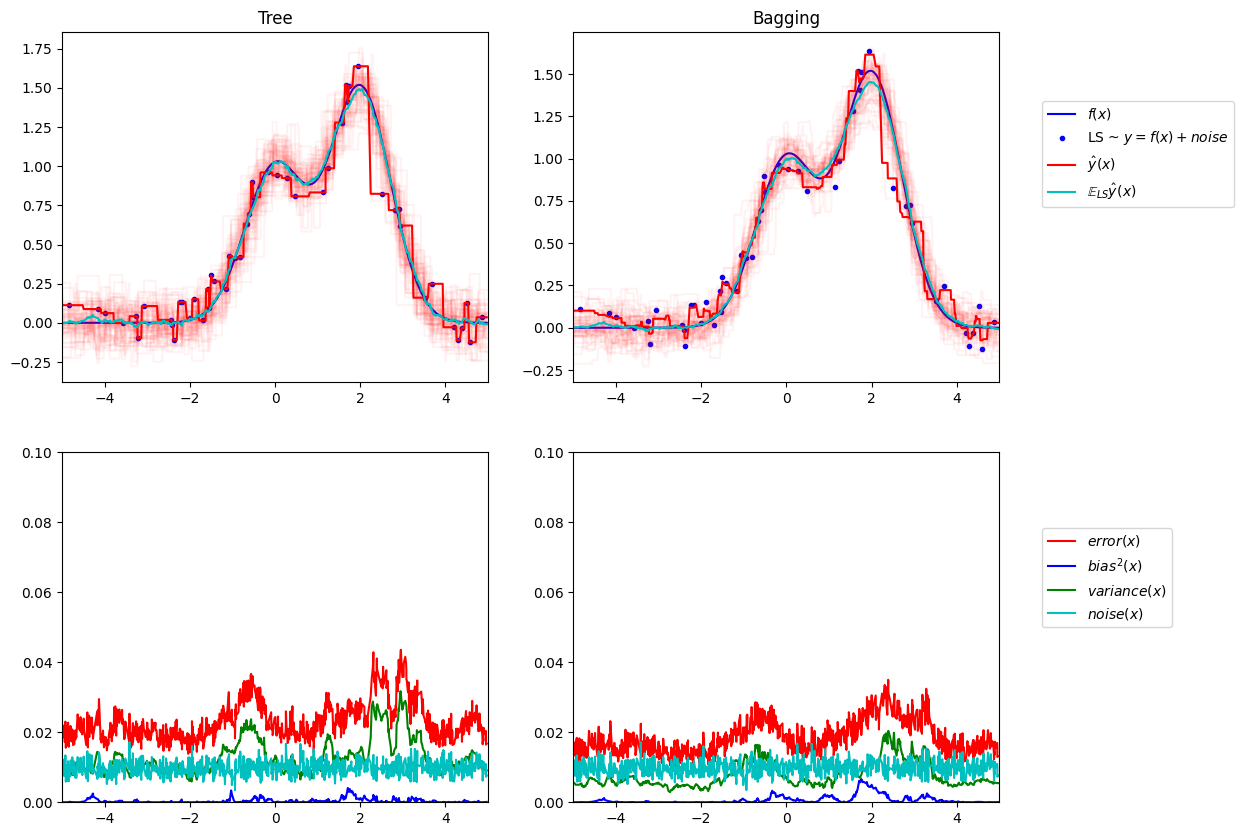

In [ ]:
from sklearn.linear_model import LinearRegression
# Settings
n_repeat = 50  # Number of iterations for computing expectations
n_train = 50  # Size of the training set
n_test = 1000  # Size of the test set
noise = 0.1  # Standard deviation of the noise

# Change this for exploring the bias-variance decomposition of other
# estimators. This should work well for estimators with high variance (e.g.,
# decision trees or KNN), but poorly for estimators with low variance (e.g.,
# linear models).
estimators = [
    ("Tree", DecisionTreeRegressor()),
    ("Bagging", BaggingRegressor(DecisionTreeRegressor())),
]

n_estimators = len(estimators)


# Generate data
def f(x):
    x = x.ravel()

    return np.exp(-(x**2)) + 1.5 * np.exp(-((x - 2) ** 2))


def generate(n_samples, noise, n_repeat=1):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)

    if n_repeat == 1:
        y = f(X) + np.random.normal(0.0, noise, n_samples)
    else:
        y = np.zeros((n_samples, n_repeat))

        for i in range(n_repeat):
            y[:, i] = f(X) + np.random.normal(0.0, noise, n_samples)

    X = X.reshape((n_samples, 1))

    return X, y


X_train = []
y_train = []

for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

plt.figure(figsize=(15, 10))

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= n_repeat * n_repeat

    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print(
        "{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
        " + {3:.4f} (var) + {4:.4f} (noise)".format(
            name, np.mean(y_error), np.mean(y_bias), np.mean(y_var), np.mean(y_noise)
        )
    )

    # Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label=r"$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c", label=r"$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == n_estimators - 1:
        plt.legend(loc=(1.1, 0.5))

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == n_estimators - 1:

        plt.legend(loc=(1.1, 0.5))

plt.subplots_adjust(right=0.75)
plt.show()